<a href="https://colab.research.google.com/github/DaviCampos09/Calculo-metricas/blob/main/Metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [17]:
%load_ext tensorboard

logdir = 'log'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [18]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x=train_images, y=train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 39ms/step - accuracy: 0.8926 - loss: 0.3461 - val_accuracy: 0.9839 - val_loss: 0.0465
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9844 - loss: 0.0488 - val_accuracy: 0.9888 - val_loss: 0.0344
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.9888 - loss: 0.0341 - val_accuracy: 0.9889 - val_loss: 0.0354
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9917 - loss: 0.0263 - val_accuracy: 0.9897 - val_loss: 0.0323
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9939 - loss: 0.0200 - val_accuracy: 0.9890 - val_loss: 0.0307


In [22]:
y_true=test_labels
y_pred = np.argmax(model.predict(test_images), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [23]:
classes=[0,1,2,3,4,5,6,7,8,9]

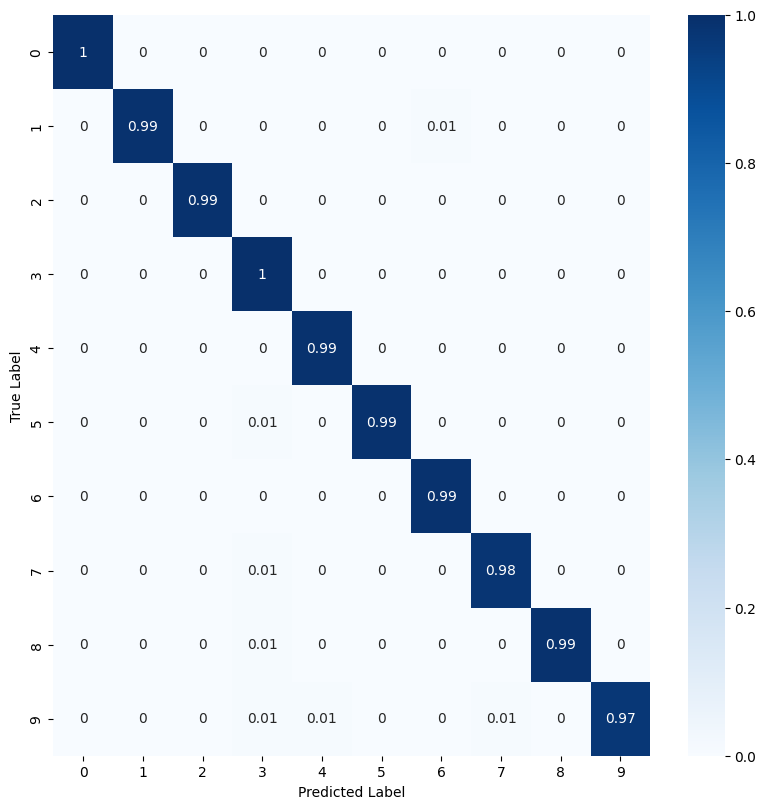

In [24]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / (con_mat.sum(axis=1)[:, np.newaxis] + 1e-8), decimals=2)


con_mat_df = pd.DataFrame(con_mat_norm, index = classes, columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap = plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [25]:
# Obter os valores de VP, FP, FN e VN para cada classe
num_classes = len(classes)
metrics = []

for i in range(num_classes):
    VP = con_mat[i, i]  # Elemento diagonal (verdadeiros positivos para a classe i)
    FN = np.sum(con_mat[i, :]) - VP  # Soma da linha menos VP (falsos negativos)
    FP = np.sum(con_mat[:, i]) - VP  # Soma da coluna menos VP (falsos positivos)
    VN = np.sum(con_mat) - (VP + FN + FP)  # Soma total menos VP, FN e FP

    # Evitar divisões por zero
    sensibilidade = VP / (VP + FN) if (VP + FN) != 0 else 0
    especificidade = VN / (VN + FP) if (VN + FP) != 0 else 0
    acuracia = (VP + VN) / np.sum(con_mat) if np.sum(con_mat) != 0 else 0
    precisao = VP / (VP + FP) if (VP + FP) != 0 else 0
    fscore = 2 * (precisao * sensibilidade) / (precisao + sensibilidade) if (precisao + sensibilidade) != 0 else 0

print(sensibilidade)
print(especificidade)
print(acuracia)
print(precisao)
print(fscore)

0.9732408325074331
0.9988877766655544
0.9963
0.9899193548387096
0.9815092453773112
